stability limit: 0.00031250000000000006


/home/class/ASK_program/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


CPU time: 0.5s
0.0
0.00031250000000000006
0.0006250000000000001
0.0009375000000000002
0.0012500000000000002
0.0015625000000000003
0.0018750000000000004
0.0021875
0.0025000000000000005
0.0028125000000000008
0.0031250000000000006
0.0034375000000000005
0.0037500000000000007
0.004062500000000001
0.004375
0.004687500000000001
0.005000000000000001
0.005312500000000001
0.0056250000000000015
0.005937500000000001
0.006250000000000001
0.0065625000000000015
0.006875000000000001
0.007187500000000001
0.0075000000000000015
0.007812500000000002
0.008125000000000002
0.008437500000000002
0.00875
0.009062500000000001
0.009375000000000001
0.009687500000000002
0.010000000000000002
0.010312500000000002
0.010625000000000002
0.010937500000000003
0.011250000000000003
0.011562500000000002
0.011875000000000002
0.012187500000000002
0.012500000000000002
0.012812500000000003
0.013125000000000003
0.013437500000000003
0.013750000000000002
0.014062500000000002
0.014375000000000002
0.014687500000000003
0.0150000000000

/home/class/ASK_program/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


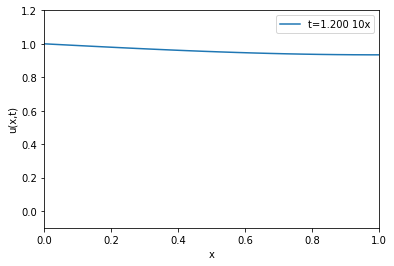

In [4]:
from numpy import linspace, zeros, linspace, asarray
import time

def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 g(x[i], t)
    i = N
    rhs[i] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + g(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 1

def dsdt(t):
    return 0

def g(x, t):
    return 0

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: asarray(f(u,t))
    u = zeros((N_t+1, len(U_0)))
    t= linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

L = 1                # Rod Length
beta = 1       # K / rho * c K = heat conduction coefficient, rho = density, c = heat capacity
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 0
dt = dx**2/(2*beta) # 0.0003125
print('stability limit:', dt)

t0 = time.clock()
u, t = ode_FE(rhs, U_0, dt, T=1.2)
t1 = time.clock()
print('CPU time: %.1fs' % (t1 - t0))

# Make movie
import os
os.system('rm tmp_*.png')
import matplotlib.pyplot as plt
plt.ion()
y = u[0,:]
lines = plt.plot(x, y)
plt.axis([x[0], x[-1], -0.1, 1.2*s(0)])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
# Plot each of the first 100 frames, then increase speed by 10x
change_speed = 100
for i in range(0, u.shape[0]):
    print(t[i])
    plot = True if i <= change_speed else i % 10 == 0
    lines[0].set_ydata(u[i,:])
    if i > change_speed:
        plt.legend(['t=%.3f 10x' % t[i]])
    else:
        plt.legend(['t=%.3f' % t[i]])
    plt.draw()
    if plot:
        plt.savefig('tmp_%04d.png' % counter)
        counter += 1
    #time.sleep(0.2)